# CE-716
# Second Assignment

### Name: Abdul Wajed Farhat  ----        Program:M.tech (WRE)
### Roll#: 203041012                         ----    year: 2nd year

In [1]:
from osgeo import gdal 
import h5py as h5
import rasterio as ras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
gdal.UseExceptions()

# HDF

In [2]:
file_name='Downloads\MOD09GQ.A2022043.h24v07.006.2022045031125.hdf'

In [3]:
ds=gdal.Open(file_name)

In [4]:
sds=ds.GetSubDatasets()

In [16]:
ds.GetMetadata()

{'ADDITIONALLAYERS': '0',
 'ASSOCIATEDINSTRUMENTSHORTNAME.1': 'MODIS',
 'ASSOCIATEDPLATFORMSHORTNAME.1': 'Terra',
 'ASSOCIATEDSENSORSHORTNAME.1': 'MODIS',
 'AUTOMATICQUALITYFLAG.1': 'Passed',
 'AUTOMATICQUALITYFLAGEXPLANATION.1': 'No automatic quality assessment is performed in the PGE',
 'CHARACTERISTICBINANGULARSIZE': '7.5',
 'CHARACTERISTICBINSIZE': '231.656358263889',
 'CLOUDOPTION': 'MOD09 internally-derived',
 'COVERAGECALCULATIONMETHOD': 'volume',
 'COVERAGEMINIMUM': '0.00999999977648258',
 'DATACOLUMNS': '4800',
 'DATAROWS': '4800',
 'DAYNIGHTFLAG': 'Day',
 'DEEPOCEANFLAG': 'Yes',
 'DESCRREVISION': '6.1',
 'EASTBOUNDINGCOORDINATE': '74.5013122138774',
 'EQUATORCROSSINGDATE.1': '2022-02-12',
 'EQUATORCROSSINGLONGITUDE.1': '66.8761436756149',
 'EQUATORCROSSINGTIME.1': '05:55:16.965753',
 'EXCLUSIONGRINGFLAG.1': 'N',
 'FIRSTLAYERSELECTIONCRITERIA': 'order of input pointer',
 'GEOANYABNORMAL': 'False',
 'GEOESTMAXRMSERROR': '50.0',
 'GLOBALGRIDCOLUMNS': '172800',
 'GLOBALGRIDROWS':

In [8]:
for sd,description in sds:
    print(description)

[4800x4800] num_observations MODIS_Grid_2D (8-bit integer)
[4800x4800] sur_refl_b01_1 MODIS_Grid_2D (16-bit integer)
[4800x4800] sur_refl_b02_1 MODIS_Grid_2D (16-bit integer)
[4800x4800] QC_250m_1 MODIS_Grid_2D (16-bit unsigned integer)
[4800x4800] obscov_1 MODIS_Grid_2D (8-bit integer)
[4800x4800] iobs_res_1 MODIS_Grid_2D (8-bit unsigned integer)
[4800x4800] orbit_pnt_1 MODIS_Grid_2D (8-bit integer)
[4800x4800] granule_pnt_1 MODIS_Grid_2D (8-bit unsigned integer)


In [18]:
redband=gdal.Open(sds[1][0])
NIRband=gdal.Open(sds[2][0])

### Q.1) MODIS image is projected in which projection system.

In [10]:
redband.GetProjection()

'PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

### the projection system is Sinusoidal

### Q.3) Mask cloud from MODIS image if present (if cloud is not present, justify how did you
get to that conclusion).
Please share the masked image without cloud alongside the image with cloud cover and
the approach used to arrive at the cloud free image.

### Q.2) Convert the DN number of MODIS image to the reflectance value. Write the steps for conversion with details and share final code along with the reflectance image.

In [11]:
redband=redband.ReadAsArray()
NIRband=NIRband.ReadAsArray()

### scale factor for MODIS MODGQ is 0.0001, so will scale the down the array by multiplying the scale factor

In [12]:
redband=redband*0.0001
NIRband=NIRband*0.0001

In [13]:
redband.max(),NIRband.max()

(1.278, 1.222)

### the maximum value for both bands are greater 1 so by normalizing the values, the range will be between zero and 1

In [14]:
#normalizing the values between 0 and 1
redband=(redband.max()-redband)/(redband.max()-redband.min())
NIRband=(NIRband.max()-NIRband)/(NIRband.max()-NIRband.min())
redband.max(),redband.min(),NIRband.max(),NIRband.min()

(1.0, 0.0, 1.0, 0.0)

In [15]:
NIRband.mean()

0.2925901941787122

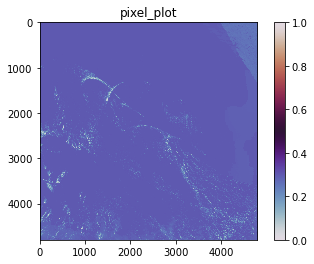

In [34]:
plt.title("pixel_plot")
pixel_plot = plt.imshow(NIRband, cmap='twilight', interpolation='nearest')
  
plt.colorbar(pixel_plot)

### so now the range is between zero and one we can plot the reflectance value

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


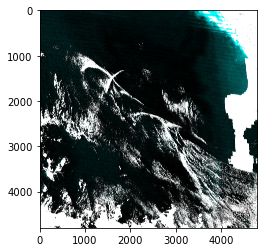

In [82]:
rgb=np.dstack((NIRband,redband,redband))
plt.imshow(rgb)

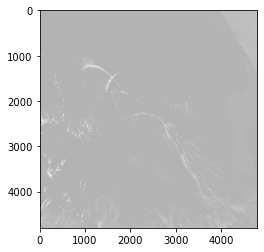

In [84]:
plt.imshow(NIRband,cmap='gray')

### Q.3) Derive sigma0 using ALOS Palsar data. Write the steps for conversion with details and share final code along with the sigma naught image

In [2]:
img=gdal.Open('F:\Assignment\palsar\VOL-ALPSRP252890370-H1.1__A')

In [3]:
img.GetMetadata()

{'AZIMUTH_LOOKS': '1.0',
 'PRODUCT_LEVEL': '1.1',
 'RANGE_LOOKS': '1.0',
 'SENSOR_BAND': 'L'}

In [4]:
col=img.RasterXSize
row=img.RasterYSize
bands=img.RasterCount

In [5]:
row,col,bands

(18432, 4640, 2)

In [6]:
#store the different HH and HV bands in different variables
HH=img.GetRasterBand(1)
HV=img.GetRasterBand(2)

In [7]:
#read the bands as array
HH_arr=HH.ReadAsArray()
HV_arr=HV.ReadAsArray()

In [8]:
HH_arr[1,1]

(-53903.066-27765.432j)

In [9]:
#take the absolute square value of each pixel
HH_intensity=np.absolute(HH_arr)**2
HV_intensity=np.absolute(HV_arr)**2

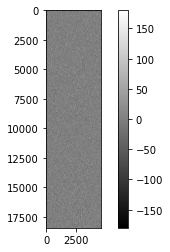

In [10]:
plt.imshow(np.angle(HH_arr,deg=True),cmap='gray')
plt.colorbar()

C:\Users\Abdul Wajed Farhat\AppData\Local\Temp\ipykernel_10384\1752402865.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.flipud(HH_intensity)),cmap='gray')


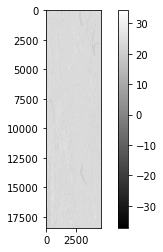

In [11]:
plt.imshow(np.log(np.flipud(HH_intensity)),cmap='gray')
plt.colorbar()

In [12]:
#use multilooking technique for changing the rectangular shape of the image to square shape
numlook=5
ind=np.array(range(0,numlook*math.floor((HH_arr.shape[0])/numlook),numlook))
print(ind)

[    0     5    10 ... 18415 18420 18425]


In [13]:
lookedHH=HH_arr[ind,:]
lookedHV=HV_arr[ind,:]

In [14]:
for look in range(numlook+1):
    lookedHH=lookedHH+HH_arr[ind+look,:]
    lookedHV=lookedHV+HV_arr[ind+look,:]

In [15]:
#use sigma naught formula to convert the pixel values to sigma naught
sigmaHH=10*np.log10(np.absolute(lookedHH)**2)-83-32
sigmaHV=10*np.log10(np.absolute(lookedHV)**2)-83-32
rat=sigmaHH-sigmaHV

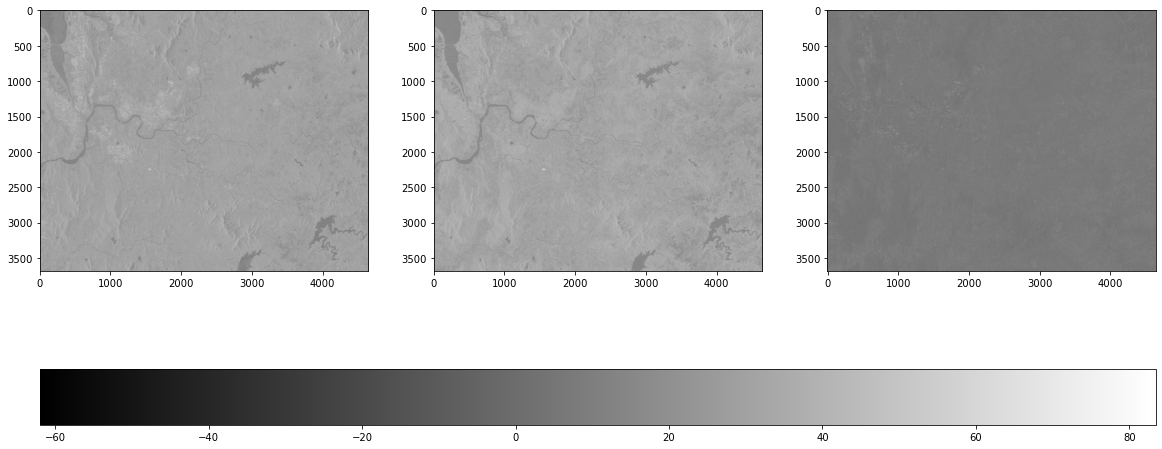

In [16]:
figure,ax=plt.subplots(1,3,figsize=(20,12))
a=ax[0].imshow(sigmaHH,cmap='gray')
a=ax[1].imshow(sigmaHV,cmap='gray')
a=ax[2].imshow(rat,cmap='gray')
figure.colorbar(a,ax=ax[0:3],orientation='horizontal')

In [17]:
#normalize the values between zero and one
sigmaHH_norm=(np.max(sigmaHH)-sigmaHH)/(np.max(sigmaHH)-np.min(sigmaHH))
sigmaHV_norm=(np.max(sigmaHV)-sigmaHV)/(np.max(sigmaHV)-np.min(sigmaHV))
rat_norm=(np.max(rat)-rat)/(np.max(rat)-np.min(rat))

 ### Q.4) Generate FCC of ALOS data using following combination and interpret your results.

### combination1: R-HH, G-HV, B-(HH-HV)

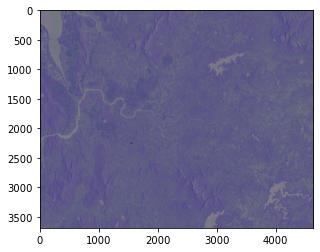

In [18]:
rgb=np.dstack((sigmaHH_norm,sigmaHV_norm,rat_norm))
plt.imshow(rgb)

### combination2: R-(HH-HV), G-HH, B-HV

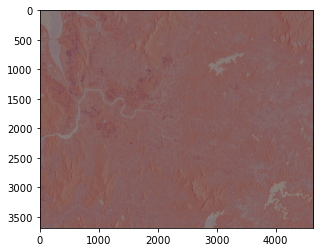

In [159]:
rgb=np.dstack((rat_norm,sigmaHH_norm,sigmaHV_norm))
plt.imshow(rgb) 

### Q.5) Compare sigma0 of ALOS data with reflectance of MODIS reflectance for two different
classes (class1_alos vs class1_MODIS and class2_alos v class2_MODIS) and
write your conclusion.
Write the comparison for both classes using reflectance image and sigma naught image
and share output images

### Normalized difference vegetation index for modis image
NDVI = (NIR – Red) / (NIR + Red)

In [39]:
NDVI_modis=(NIRband-redband)/(NIRband+redband)

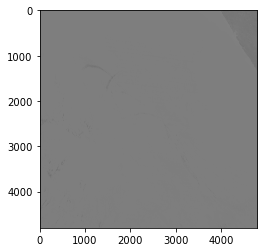

In [42]:
plt.imshow(NDVI_modis,cmap='gray')